# Basic EDA for cryptocurrency

In this notebook, we are going to try and explore the price history of different cryptocurrencies.

As we created on the before notebook, the files that we will use are in the `data/processed/cryptocurrencypricehistory` directory. Now, we are going to import the necessary modules and then list the input files.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
DATA_PATH = Path('../../data/processed/cryptocurrencypricehistory')

In [2]:
list(DATA_PATH.iterdir())

[WindowsPath('../../data/processed/cryptocurrencypricehistory/bitcoin_dataset.csv'),
 WindowsPath('../../data/processed/cryptocurrencypricehistory/cryptocurrency_close_values.csv'),
 WindowsPath('../../data/processed/cryptocurrencypricehistory/ethereum_dataset.csv')]

### Bitcoin vs. Ethereum
First, if we want to explore `Ethereum` or the `Bitcoin` as it is the market leader in this space, we will be the following.

In [3]:
df = pd.read_csv(DATA_PATH / 'cryptocurrency_close_values.csv', 
                 parse_dates=['Date'], index_col='Date')

df.head()

,bitcoin_cash_price,bitcoin_cash_price.1,bitcoin_price,bitconnect_price,dash_price,ethereum_classic_price,ethereum_price,iota_price,litecoin_price,monero_price,nem_price,neo_price,numeraire_price,omisego_price,qtum_price,ripple_price,stratis_price,waves_price
Date,,,,,,,,,,,,,,,,,,
2017-09-05,541.71,541.71,4376.53,129.42,327.23,16.58,312.99,0.613085,71.29,118.82,0.286227,22.80,21.53,10.98,11.71,0.215189,6.03,4.98
2017-09-04,517.24,517.24,4236.31,114.13,316.13,15.84,295.17,0.566472,65.21,106.17,0.273220,21.83,20.74,8.78,10.98,0.204968,5.77,4.66
2017-09-03,607.43,607.43,4582.96,130.99,356.39,18.57,347.48,0.743968,76.84,126.01,0.307264,30.32,26.90,10.57,15.29,0.228811,6.59,5.20
2017-09-02,575.90,575.90,4578.77,131.33,350.17,20.08,348.98,0.695547,79.02,124.80,0.295884,31.72,27.24,10.80,16.39,0.226669,6.34,5.23
2017-09-01,622.17,622.17,4892.01,140.97,393.35,21.94,387.74,0.807778,86.04,141.20,0.332310,32.01,32.45,11.97,18.26,0.248479,7.25,5.74


In [4]:
df.index = pd.to_datetime(df.index)
df.sort_index(inplace=True)

Now, let's create a plot of the closing values of the column `bitcoin_price` and `Ethereum_price` of the previous table and we will be able to observe how the price has changed over time.

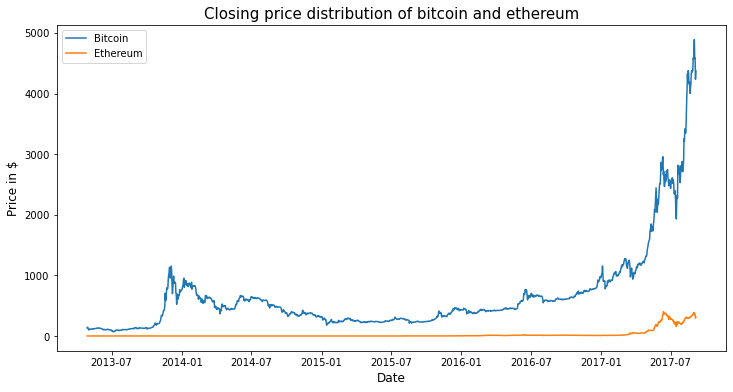

In [5]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))
plt.plot(df.index, df.bitcoin_price, label='Bitcoin')
plt.plot(df.index, df.ethereum_price, label='Ethereum')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in $', fontsize=12)
plt.title("Closing price distribution of bitcoin and ethereum", fontsize=15)
plt.legend()

plt.show()

As we can see in the previous plot the difference between bitcoin and ethereum is very big, basically because bitcoin is the most valuable cryptocurrency that exists nowadays and the value it started to grow up since the first month of 2014. On the other hand, Ethereum grew up in the middñe of 2017, the years later.

Now let us build a heat map using correlation to see how the price of different currencies change with respect to each other.

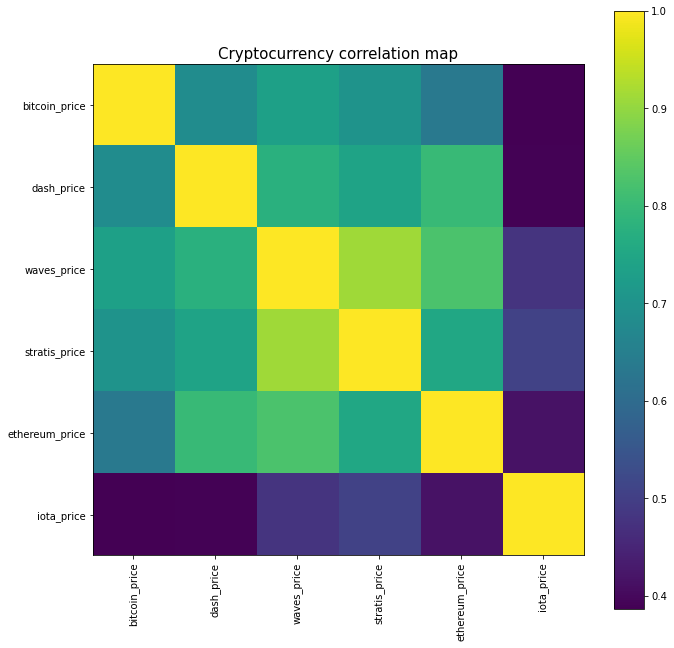

In [6]:
corrmat = df[['bitcoin_price', 'dash_price', 
              'waves_price', 'stratis_price', 
              'ethereum_price', 'iota_price']].corr(method='spearman')
names = corrmat.columns
plt.figure(figsize=(11, 11))
plt.imshow(corrmat)
plt.title("Cryptocurrency correlation map", fontsize=15)
plt.colorbar()

plt.xticks(range(len(names)), names, rotation=90)
plt.yticks(range(len(names)), names)

plt.show()

### Future price prediction

Now that we have explored the dataset, one possible next step could be to predict the future price of the currency.
First, we are going to install Prophet, to do so we are going to use pip.
```bash
$ pip install fbprophet
```
We could use the Prophet library of facebook here to do the predictions\[1\].

In [7]:
# !pip install fbprophet

In [8]:
from fbprophet import Prophet

to_predict_df = df[['ethereum_price']]
to_predict_df.reset_index(inplace=True)
to_predict_df.columns = ['ds', 'y']

model = Prophet()
model.fit(to_predict_df)

Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Then, we can see the plot using the previous information to create a threshold that they can oscillate the predicted values.

In [9]:
future = model.make_future_dataframe(periods=360)
forecast = model.predict(future)

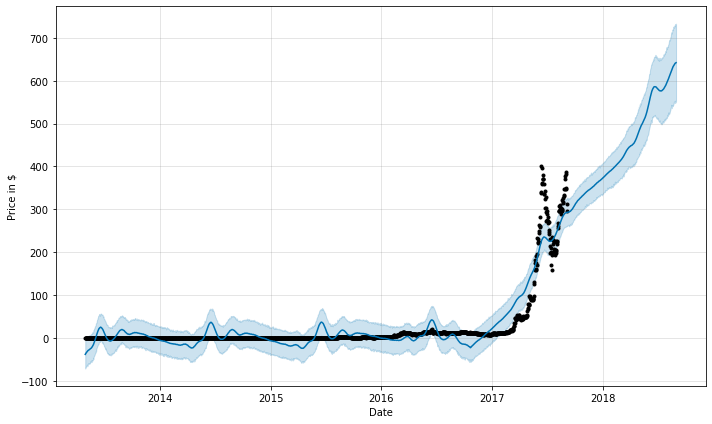

In [10]:
model.plot(forecast, xlabel='Date', ylabel='Price in $');

As we can see in the previous graphics, we generated plots to estimate the values of Ethereum in the next year. Also, we can predict the different currencies in `cryptocurrency_close_values.csv` only changing the currency parameter in the before function.

## References

\[1\] [Installation | Prophet](https://facebook.github.io/prophet/docs/installation.html)

\[2\] [Quick Start | Prophet](https://facebook.github.io/prophet/docs/quick_start.html#python-api)